*****************************+ ./data/Annotated_spectra/CAII_Zn_000_oxalate_04_221116.txt ./data/Annotated_spectra/CAII_Zn_15mM_oxalate_31_221116.txt *****************************
(214, 2) (214, 2) (210, 2) (210, 2)
Rad_step 0.14004052312111562
Size X Y
428 428
----------------------------------------------
STATUS
Original peaks free: 	 (array([  3,   7,  32,  42,  46,  52,  56,  60,  69,  70,  71,  73,  74,
        77, 108, 115, 159, 164, 171, 176, 185, 195, 200, 201, 210, 211,
       212]),)
New peaks free:			 (array([  3,   6,   7,  16,  23,  30,  34,  35,  37,  40,  42,  52,  56,
        60,  69,  70,  71,  73,  74,  77,  82,  89,  97, 108, 124, 127,
       128, 135, 137, 145, 164, 166, 171, 176, 185, 190, 195, 197, 200,
       201, 210, 211, 212, 213]),)
----------------------------------------------
STATUS
Original peaks free: 	 (array([ 32,  60,  71,  73,  74,  77, 108, 164, 185, 201, 211, 212]),)
New peaks free:			 (array([  3,   7,  16,  23,  30,  34,  35,  37,  40,  60,  71, 

/Users/andrea/PycharmProjects/peaks-identification/peaksIdentification/peaks_manager.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dd = self.distance[[rows]][:,cols]
/Users/andrea/PycharmProjects/peaks-identification/peaksIdentification/peaks_manager.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dd = self.distance[[rows]][:,cols]


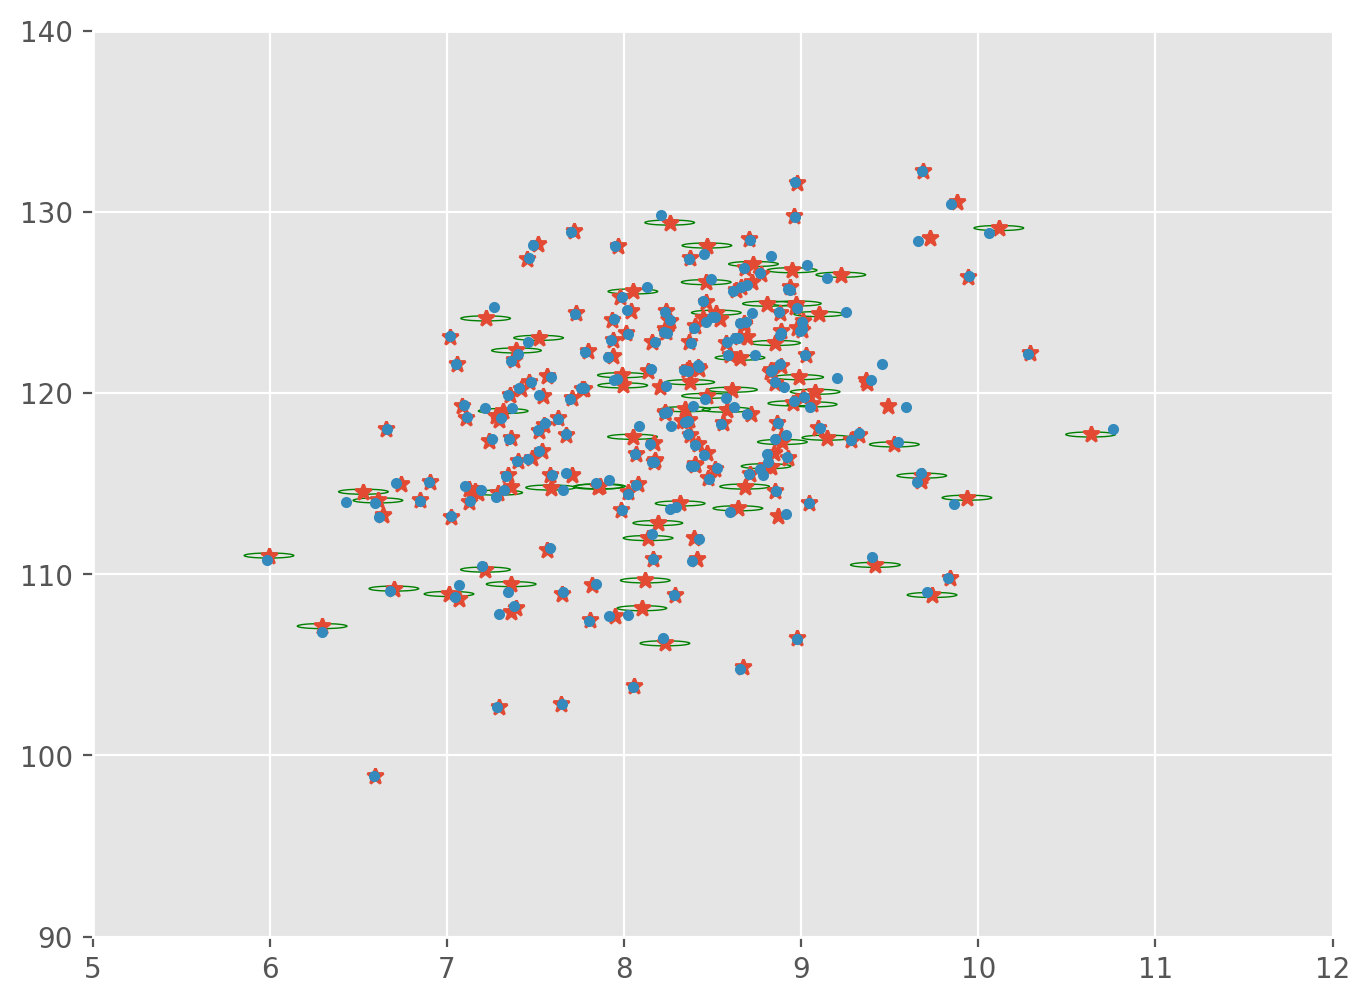

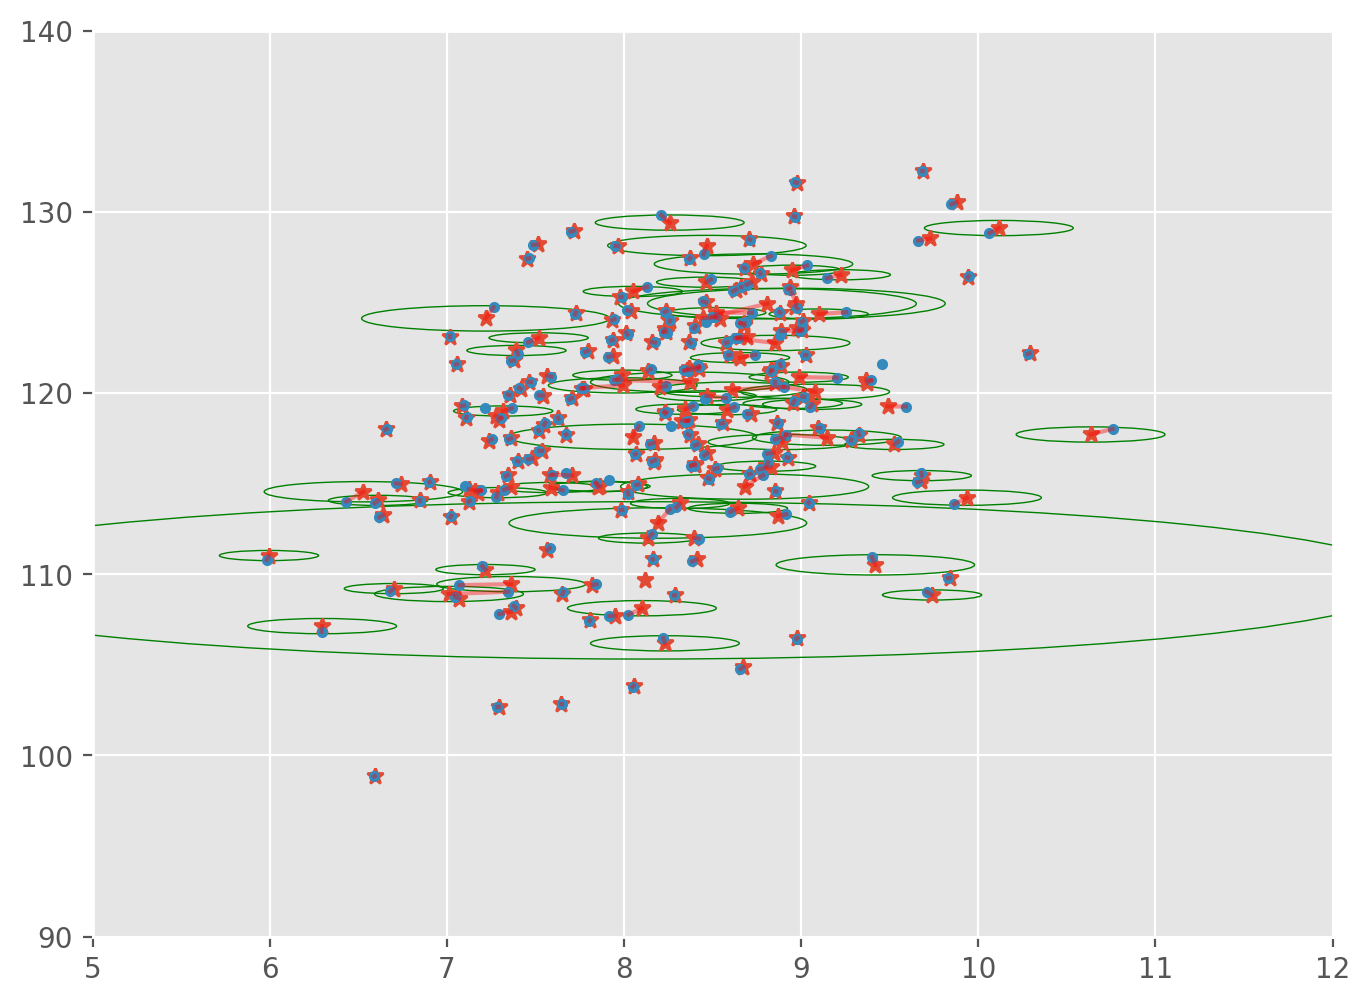

In [1]:
import os
import numpy as np
import pickle
import sys
import re
import matplotlib.pyplot as plt
from peaksIdentification.peaks_assignement import generate_data, reassign_peaks
plt.style.use('ggplot')

#list_files = [["CAIIZn_000_furo_03_170317","CAIIZn_100_furo_11_170317"],
 # ["CAII_Zn_000_oxalate_04_221116","CAII_Zn_15mM_oxalate_31_221116"],
  #["CAII_Zn_000_pTS_04_291216","CAII_Zn_100_pTS_15_291216"],
  #["CAII_Zn_000_pTulpho_03_220317","CAII_Zn_100f_pTulpho_18_220317"],
  #["CAIIZn_0.00_sulpiride_03_040417","CAIIZn_5mM_sulpiride_19_040417"]]

list_files = [["CAII_Zn_000_oxalate_04_221116","CAII_Zn_15mM_oxalate_31_221116"]]
path = "./data/Annotated_spectra/"

def normSpect(in1, in2):
    if in1.shape[0] > in2.shape[0]:
        gra = in1
        pic = in2
        inv = False
    elif in1.shape[0] < in2.shape[0]:
        gra = in2
        pic = in1
        inv = True
    else:
        return in1, in2

    dim = gra.shape[0]
    diff = gra.shape[0] - pic.shape[0]
    zpeaks = np.zeros((dim,2))
    zpeaks[:-diff,:] = pic
    if inv: 
        return zpeaks, gra
    else:
        return gra, zpeaks

def findkey(dict, valuein):
    return [name for name, value in dict.items() if ( valuein[0] == float(value[0][0]) and valuein[1] == float(value[0][1]))]

def readtxt(filein):
    parse = open(filein,"r").readlines()
    sparse = filter(lambda x: re.match(r"^H/N[ \t]+\w+[ \t]+\w+[ \t]+[0-9 .]+[ \t]+[0-9 .]+", x), parse)
    mapout = dict(map(lambda x: [re.split(r"[ \t]+",x)[1],
     [[re.split(r"[ \t]+",x)[3], re.split(r"[ \t]+",x)[4]]]], sparse))
    return mapout

#ass1 = readtxt("/Volumes/SSDesterno/git/peaks-identification/data/Annotated_spectra/CAII_Zn_000_oxalate_04_221116.txt")
#ass2 = readtxt("/Volumes/SSDesterno/git/peaks-identification/data/Annotated_spectra/CAII_Zn_15mM_oxalate_31_221116.txt")
results = {}
for fi in list_files:

    fin1 = path+fi[0]+".txt"
    fin2 = path+fi[1]+".txt"
    print("*****************************+", fin1, fin2, "*****************************")
    ass1 = readtxt(fin1)
    ass2 = readtxt(fin2)
    npa1 = []
    npa2 = []
    for name, value in ass1.items():
        if name in ass2.keys():
            npa1.append(value[0])
            npa2.append(ass2[name][0])

    for name, value in ass1.items():
        if name not in ass2.keys():
            npa1.append(value[0])

    for name, value in ass2.items():
        if name not in ass1.keys():
            npa2.append(value[0])

    npa1t = np.array(list(map(lambda x : x[0], ass1.values())))
    npa2t = np.array(list(map(lambda x : x[0], ass2.values())))
    npa1 = np.array(npa1)
    npa2 = np.array(npa2)
    npa1 = np.asfarray(npa1, float)
    npa2 = np.asfarray(npa2, float)
    #np.savetxt("save1.csv",npa1,delimiter=',')
    #for i,a in zip(npa2, ass2.keys()):
    #    print(i,a, ass2[a], findkey(ass2, i))
    #print(npa1)
    #print(npa1t)
    print(npa1.shape, npa1t.shape, npa2.shape, npa2t.shape)
    v1, v2 = normSpect(npa1, npa2)

    #allineo i vettori
    
    perc = 0.01
    peakmanager, score = reassign_peaks(v1, v2, perc, DEBUG=True)
    X, Y = peakmanager.get_couples_old()
   
    good = 0
    bad = 0
    assfin = []
    for x, y in zip(X, Y):
        if findkey(ass1,x) == findkey(ass2,y):
            good = good + 1
        else:
            bad = bad +1
        print(x, "\t-->", y, "keyx ", findkey(ass1,x), "keyy ", findkey(ass2,y))
        assfin.append([findkey(ass1,x),findkey(ass2,y)])
    print("Good = ", good)
    print("Bad = ", bad)
    print("Perc good", good/(bad+good))
    #results[fi[0]+"_"+fi[1]] = {"Good": good, "Bad": bad, "Perc ": good/(bad+good), "assfin": assfin}
    results[fi[0]+"_"+fi[1]] = {"Good": good, "Bad": bad, "Perc ": good/(bad+good), "dim": [npa1.shape,npa2.shape]}



   




In [5]:
#%%
import plotly.express as px
import pandas as pd
l1= list(ass1.keys())
#l2= list(ass2.keys())

x = np.append(npa1[:,0], npa2[:,0])
y = np.append(npa1[:,1], npa2[:,1])
color1 = ["fix" for i in npa1[:,0]]
color2 = []
l2 = []
for x, y in zip(v1, v2):
    if findkey(ass1,x) == findkey(ass2,y) and (x[0] > 0 and y[0] > 0):
        color2.append("good")
        l2.append(findkey(ass1,x) )
    elif (x[0] > 0 and y[0] > 0):
        color2.append("bad") 
        l2.append(findkey(ass2,y)[0]+"->"+findkey(ass1,x)[0])
print(type(l1), type(l2))

l = l1+list(l2)
#color2 = ["2" for i in npa2[:,0]]
df = pd.DataFrame({"H1":np.append(npa1[:,0],npa2[:,0]), "N1":np.append(npa1[:,1], npa2[:,1]), "text":l, "spectra": color1+color2})

fig = px.scatter(df, x="H1", y="N1", text="text", color="spectra",width=1024, height=768)


fig.show()
print(l)
#df = px.data.tips()
#fig, ax = plt.subplots()
#v10l = list(v1[:,0])
#v11l = list(v1[:,1])
#ax.scatter(v10l, v11l,color='r')
#ax.scatter(v2[:,0], v2[:,1],color='b')
#for i, txt in enumerate(list(ass1.keys())):
#    ax.annotate(txt, v10l[i], v11l[:,1][i])
#plt.show()
#ass1.keys()

<class 'list'> <class 'list'>


['A115', 'A116', 'A133', 'A141', 'A152', 'A173', 'A23', 'A247', 'A257', 'A38', 'A54', 'A77', 'C205', 'D101', 'D110', 'D129', 'D138', 'D161', 'D164', 'D174', 'D179', 'D189', 'D242', 'D32', 'D34', 'D41', 'D52', 'D71', 'D72', 'E106', 'E117', 'E186', 'E204', 'E213', 'E220', 'E233', 'E235', 'E237', 'E238', 'E26', 'E69', 'F130', 'F146', 'F175', 'F178', 'F225', 'F230', 'F259', 'F66', 'F70', 'F93', 'F95', 'G102', 'G104', 'G128', 'G131', 'G139', 'G144', 'G150', 'G170', 'G182', 'G195', 'G232', 'G234', 'G25', 'G6', 'G63', 'G8', 'G81', 'G82', 'G86', 'G98', 'H107', 'H119', 'H122', 'H94', 'H96', 'I145', 'I166', 'I209', 'I215', 'I255', 'I33', 'I59', 'I91', 'K111', 'K112', 'K113', 'K126', 'K132', 'K148', 'K153', 'K158', 'K167', 'K169', 'K171', 'K212', 'K224', 'K227', 'K24', 'K251', 'K256', 'K260', 'K39', 'K45', 'K76', 'K80', 'L100', 'L118', 'L120', 'L140', 'L143', 'L147', 'L156', 'L163', 'L183', 'L184', 'L188', 'L202', 'L203', 'L211', 'L223', 'L228', 'L239', 'L250', 'L44', 'L47', 'L57', 'L60', 'L79', 

In [5]:
print(results)

{'CAIIZn_000_furo_03_170317_CAIIZn_100_furo_11_170317': {'Good': 213, 'Bad': 2, 'Perc ': 0.9906976744186047, 'dim': [(215, 2), (213, 2)]}, 'CAII_Zn_000_oxalate_04_221116_CAII_Zn_15mM_oxalate_31_221116': {'Good': 210, 'Bad': 4, 'Perc ': 0.9813084112149533, 'dim': [(214, 2), (210, 2)]}, 'CAII_Zn_000_pTS_04_291216_CAII_Zn_100_pTS_15_291216': {'Good': 212, 'Bad': 2, 'Perc ': 0.9906542056074766, 'dim': [(214, 2), (212, 2)]}, 'CAII_Zn_000_pTulpho_03_220317_CAII_Zn_100f_pTulpho_18_220317': {'Good': 214, 'Bad': 0, 'Perc ': 1.0, 'dim': [(214, 2), (214, 2)]}, 'CAIIZn_0.00_sulpiride_03_040417_CAIIZn_5mM_sulpiride_19_040417': {'Good': 214, 'Bad': 1, 'Perc ': 0.9953488372093023, 'dim': [(215, 2), (214, 2)]}}


Size X Y
430 430


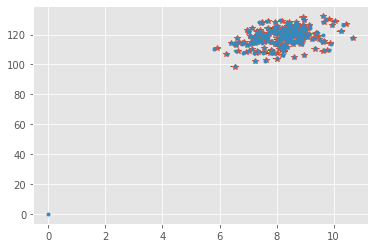

----------------------------------------------
STATUS
Original peaks free: 	 (array([ 26,  28,  30,  58,  60,  63,  68,  88,  94, 101, 102, 117, 125,
       152, 156, 167, 169, 179, 202, 204, 206, 213]),)
New peaks free:			 (array([  6,  15,  19,  26,  28,  30,  31,  34,  44,  46,  60,  63,  70,
        87,  92,  93, 100, 101, 102, 103, 106, 116, 124, 128, 129, 135,
       136, 151, 161, 166, 168, 178, 186, 188, 195, 201, 203, 204, 205,
       207, 208, 213, 214]),)
----------------------------------------------
STATUS
Original peaks free: 	 (array([ 30,  68, 102, 117, 156, 167, 179]),)
New peaks free:			 (array([  6,  15,  19,  30,  31,  34,  44,  70,  92,  93, 102, 103, 106,
       116, 128, 129, 135, 136, 166, 178, 186, 188, 195, 201, 204, 207,
       208, 213, 214]),)
----------------------------------------------
STATUS
Original peaks free: 	 (array([ 68, 102]),)
New peaks free:			 (array([ 15,  19,  31,  44,  70,  92,  93, 102, 103, 106, 128, 129, 135,
       136, 166, 178, 188, 

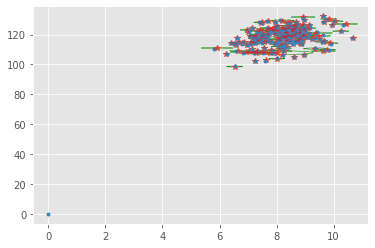

shift perc: 0.25
>> score -192.09302325581396 %
[  8.834 122.898] 	--> [  8.812 122.941] keyx  ['A141'] keyy  ['A141']
[  8.328 121.247] 	--> [  8.314 121.289] keyx  ['A152'] keyy  ['E233']
[  8.968 123.424] 	--> [  8.99  123.537] keyx  ['A173'] keyy  ['A173']
[  8.586 122.918] 	--> [  8.547 122.987] keyx  ['A23'] keyy  ['R89']
[  8.323 123.643] 	--> [  8.312 123.528] keyx  ['A257'] keyy  ['A257']
[  7.446 127.7  ] 	--> [  7.478 127.765] keyx  ['A38'] keyy  ['A38']
[  8.214 123.861] 	--> [  8.25  123.928] keyx  ['A77'] keyy  ['A77']
[  8.822 121.345] 	--> [  8.827 121.4  ] keyx  ['D101'] keyy  ['D101']
[  9.644 132.245] 	--> [  9.631 132.206] keyx  ['D110'] keyy  ['D110']
[  7.417 116.241] 	--> [  7.36  116.358] keyx  ['D129'] keyy  ['I166']
[  7.832 114.894] 	--> [  7.832 114.949] keyx  ['D138'] keyy  ['D138']
[  8.332 117.56 ] 	--> [  8.326 117.625] keyx  ['D161'] keyy  ['D161']
[  8.126 116.336] 	--> [  8.123 116.209] keyx  ['D164'] keyy  ['D164']
[  8.565 122.041] 	--> [  8.565 122

In [126]:
from peaksIdentification.peaks_assignement import generate_data, reassign_peaks
N_PEAKS = 20
N_SHIFTS = 5

peaks, new_peaks = generate_data( n_peaks=N_PEAKS, n_shifts=N_SHIFTS)
perc = N_SHIFTS/N_PEAKS

peakmanager, score = reassign_peaks(v1, v2, perc, DEBUG=True)

print("shift perc:", perc)
print(">> score {} %".format(score))

X, Y = peakmanager.get_couples()
for x, y in zip(X, Y):
    print(x, "\t-->", y, "keyx ", findkey(ass1,x), "keyy ", findkey(ass2,y))

In [12]:
good = 0
bad = 0
for x, y in zip(v1, v2):
    if findkey(ass1,x) == findkey(ass2,y):
        good = good + 1
    else:
        bad = bad +1
    print(x, "\t-->", y, "keyx ", findkey(ass1,x), "keyy ", findkey(ass2,y))
print("Good = ", good)
print("Bad = ", bad)
print("Perc good", good/(bad+good))


[  7.565 120.956] 	--> [  7.589 120.905] keyx  ['A115'] keyy  ['A115']
[  8.136 111.991] 	--> [  8.159 112.221] keyx  ['A116'] keyy  ['A116']
[  8.037 124.522] 	--> [  8.019 124.563] keyx  ['A133'] keyy  ['A133']
[  8.855 122.759] 	--> [  8.882 123.214] keyx  ['A141'] keyy  ['A141']
[  8.354 121.291] 	--> [  8.341 121.24 ] keyx  ['A152'] keyy  ['A152']
[  9.004 123.458] 	--> [  8.993 123.43 ] keyx  ['A173'] keyy  ['A173']
[  8.656 123.082] 	--> [  8.626 123.016] keyx  ['A23'] keyy  ['A23']
[  7.993 120.418] 	--> [  7.945 120.723] keyx  ['A247'] keyy  ['A247']
[  8.403 123.674] 	--> [  8.394 123.569] keyx  ['A257'] keyy  ['A257']
[  7.455 127.411] 	--> [  7.465 127.434] keyx  ['A38'] keyy  ['A38']
[  7.417 120.224] 	--> [  7.408 120.281] keyx  ['A54'] keyy  ['A54']
[  8.232 123.512] 	--> [  8.223 123.378] keyx  ['A77'] keyy  ['A77']
[  7.586 114.78 ] 	--> [  7.653 114.631] keyx  ['C205'] keyy  ['C205']
[  8.83 121.25] 	--> [  8.838 121.263] keyx  ['D101'] keyy  ['D101']
[  9.686 132.242

In [63]:
#RMSD minimization
v1x = v1[:,0]
v1y = v1[:,1]
v2x = v2[:,0]
v2y = v2[:,1]
dtx = np.linspace(-0.1,0.1,10000)
dty = np.linspace(-5,5,10000)
rsx = np.sqrt(np.sum((v1x-v2x)**2)/v1x.shape[0])
rsy = np.sqrt(np.sum((v1y-v2y)**2)/v1y.shape[0])
print(rsx,rsy)

gx = [np.sqrt(np.sum((v1x-v2x+x)**2)/v1x.shape[0]) for x in dtx ]
gy = [np.sqrt(np.sum((v1y-v2y+y)**2)/v1y.shape[0]) for y in dty ]
minx = np.amin(gx)
miny = np.amin(gy)
indexx = np.where(gx == np.amin(gx))
indexy = np.where(gy == np.amin(gy))

print("minx", minx, "index", indexx[0])
print("miny", miny, "index", indexy[0])

1.1423236783182389 10.6010551602955
minx 1.1415978147623174 index [2964]
miny 10.588523697239085 index [4484]


In [61]:
gx[2964]

1.1415978147623174